In [1]:
#General imports.
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os
import scipy

import uproot # https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white'

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.12/06


In [33]:
import sqlite3
conn = sqlite3.connect('v9_timing.db')

In [34]:
c = conn.cursor()

In [35]:
c.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(c.fetchall())

[('TimeSource',), ('TimeEvent',), ('TimeModule',)]


In [36]:
TimeSource = pandas.read_sql_query("SELECT * from TimeSource", conn)
TimeEvent = pandas.read_sql_query("SELECT * from TimeEvent", conn)
TimeModule = pandas.read_sql_query("SELECT * from TimeModule", conn)

In [37]:
TimeSource.head()

,Run,SubRun,Event,Source,Time
0,17969,71,1,MidasBankInput,0.000023
1,17969,71,2,MidasBankInput,0.000003
2,17969,71,3,MidasBankInput,0.000003
3,17969,71,4,MidasBankInput,0.000005
4,17969,71,5,MidasBankInput,0.000003


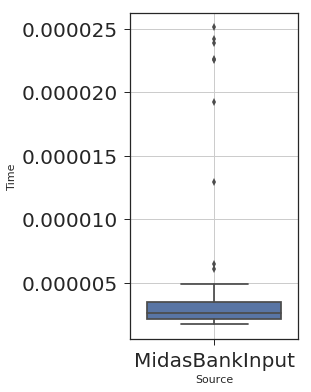

In [7]:
fig, ax = plt.subplots(figsize=(3,6))
sns.boxplot(x="Source", y="Time", data=TimeSource)

plt.xticks(rotation=0)
plt.grid()
#plt.yscale('log')
plt.show()

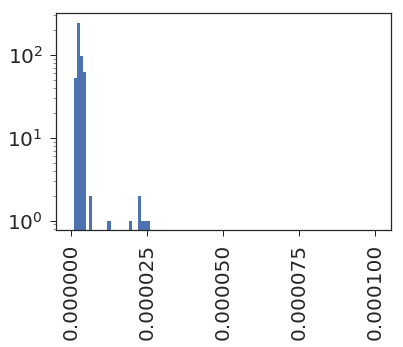

In [8]:
plt.hist(TimeSource['Time'],bins=100,range=(0,0.0001))
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

In [9]:
TimeEvent.head()

,Run,SubRun,Event,Time
0,17969,71,1,0.104054
1,17969,71,2,0.236796
2,17969,71,3,0.008053
3,17969,71,4,1.206120
4,17969,71,5,0.008013


In [10]:
print("Total Event Time: ", TimeEvent['Time'].sum())

Total Event Time:  92.14490542799999


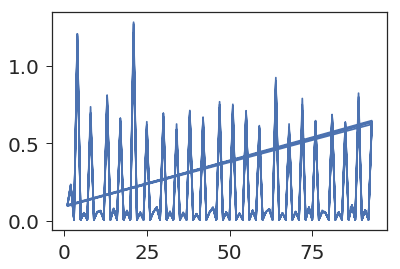

In [11]:
plt.plot(TimeEvent['Event'],TimeEvent['Time'])
plt.show()

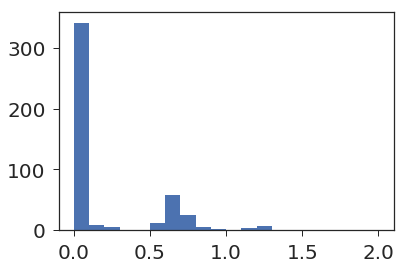

In [12]:
plt.hist(TimeEvent['Time'],bins=20,range=(0,2))
plt.show()

In [13]:
TimeModule.head()

,Run,SubRun,Event,Path,ModuleLabel,ModuleType,Time
0,17969,71,1,muonPath,fzInflater,FZInflater,0.006142
1,17969,71,1,muonPath,utcaUnpacker,UTCAUnpacker,0.001043
2,17969,71,1,muonPath,cccUnpacker,FC7Unpacker,0.002277
3,17969,71,1,muonPath,headerUnpacker,CaloHeaderUnpacker,0.001576
4,17969,71,1,muonPath,rawUnpacker,CaloRawUnpacker,0.087124


In [14]:
TimeModule.describe()

,Run,SubRun,Event,Time
count,7460.0,7460.0,7460.000000,7460.000000
mean,17969.0,71.0,47.364611,0.012338
std,0.0,0.0,26.913805,0.064877
min,17969.0,71.0,1.000000,0.000005
25%,17969.0,71.0,24.000000,0.000102
50%,17969.0,71.0,47.000000,0.000423
75%,17969.0,71.0,70.000000,0.001689
max,17969.0,71.0,93.000000,1.053334


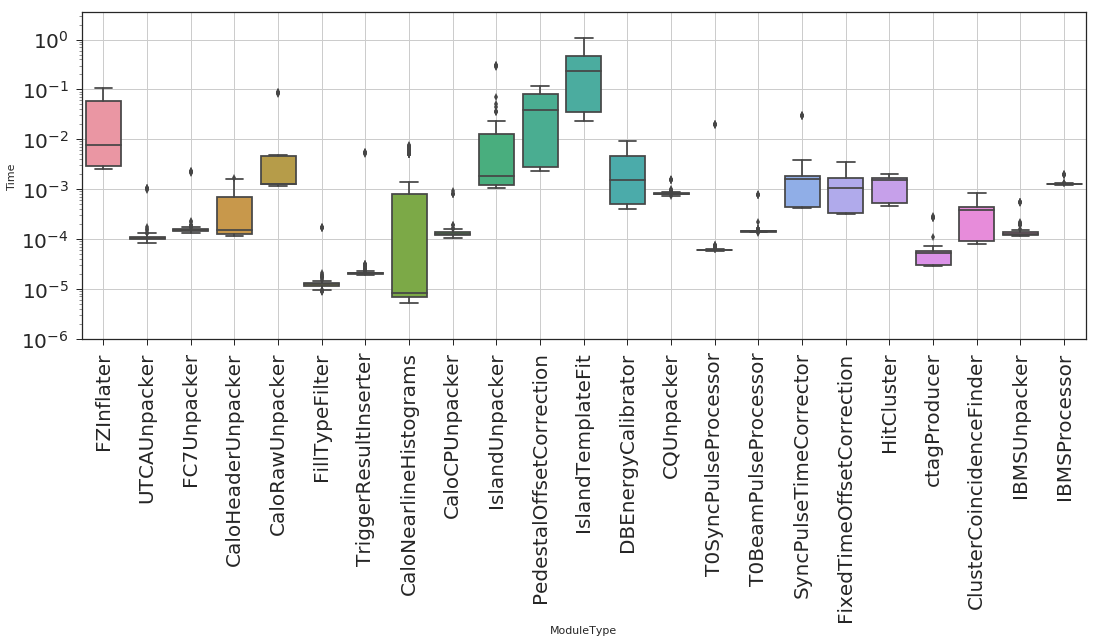

In [39]:
fig, ax = plt.subplots(figsize=(18,6))
sns.boxplot(x="ModuleType", y="Time", data=TimeModule)

plt.xticks(rotation=90)
plt.grid()
plt.yscale('log')
plt.ylim(10**(-6),3.5)
plt.show()

In [19]:
print("Total Module Time: ", TimeModule['Time'].sum())

Total Module Time:  18.44912988


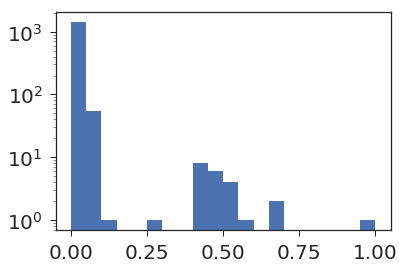

In [38]:
plt.hist(TimeModule['Time'],bins=20,range=(0,1))
plt.yscale('log')
plt.show()

In [12]:
IslandTemplateFit = TimeModule.loc[TimeModule['ModuleType'] == 'IslandTemplateFit']

In [40]:
IslandTemplateFit.head()

,Run,SubRun,Event,Path,ModuleLabel,ModuleType,Time
17,17969,71,2,muonPath,islandFitterDAQ,IslandTemplateFit,0.096018
50,17969,71,4,muonPath,islandFitterDAQ,IslandTemplateFit,0.669766
83,17969,71,6,muonPath,islandFitterDAQ,IslandTemplateFit,0.029149
116,17969,71,8,muonPath,islandFitterDAQ,IslandTemplateFit,0.436400
157,17969,71,11,muonPath,islandFitterDAQ,IslandTemplateFit,0.042295


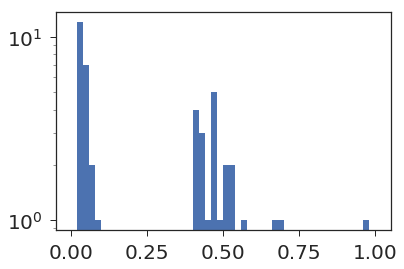

In [39]:
plt.hist(IslandTemplateFit['Time'],bins=50,range=(0,1))
plt.yscale('log')
plt.show()

---

### Compare this to the v8 version of this db

In [13]:
import sqlite3
conn8 = sqlite3.connect('.timing_v8.db')

In [14]:
c8 = conn8.cursor()

In [15]:
c8.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(c8.fetchall())

[('TimeSource',), ('TimeEvent',), ('TimeModule',)]


In [16]:
TimeSource8 = pandas.read_sql_query("SELECT * from TimeSource", conn8)
TimeEvent8 = pandas.read_sql_query("SELECT * from TimeEvent", conn8)
TimeModule8 = pandas.read_sql_query("SELECT * from TimeModule", conn8)

In [18]:
TimeSource8.head()

,Run,SubRun,Event,Source,Time
0,17969,71,1,MidasBankInput,0.000090
1,17969,71,2,MidasBankInput,0.000003
2,17969,71,3,MidasBankInput,0.000002
3,17969,71,4,MidasBankInput,0.000004
4,17969,71,5,MidasBankInput,0.000004


NameError: name 'TimeModule8' is not defined

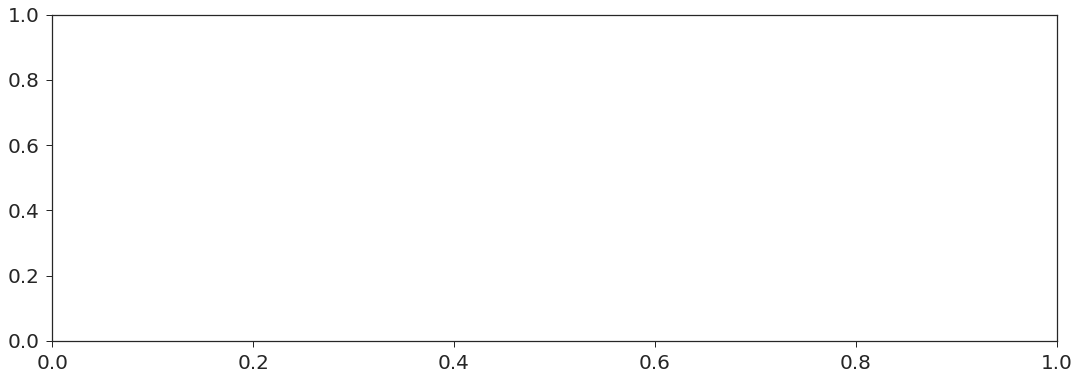

In [38]:
fig, ax = plt.subplots(figsize=(18,6))
sns.boxplot(x="ModuleType", y="Time", data=TimeModule8)

plt.xticks(rotation=90)
plt.grid()
plt.yscale('log')
plt.ylim(10**(-6),3.5)
plt.show()

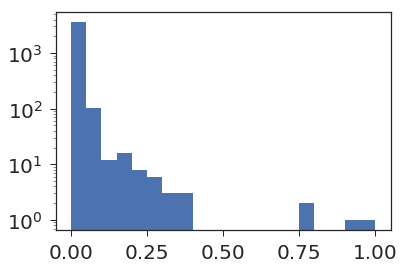

In [20]:
plt.hist(TimeModule8['Time'],bins=20,range=(0,1))
plt.yscale('log')
plt.show()

---

In [16]:
import sqlite3
conn = sqlite3.connect('bycalotemplates_timing.db')

In [17]:
c = conn.cursor()

In [18]:
c.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(c.fetchall())

[('TimeSource',), ('TimeEvent',), ('TimeModule',)]


In [19]:
TimeSource = pandas.read_sql_query("SELECT * from TimeSource", conn)
TimeEvent = pandas.read_sql_query("SELECT * from TimeEvent", conn)
TimeModule = pandas.read_sql_query("SELECT * from TimeModule", conn)

In [20]:
TimeSource.head()

,Run,SubRun,Event,Source,Time
0,17969,71,1,MidasBankInput,0.000022
1,17969,71,2,MidasBankInput,0.000003
2,17969,71,3,MidasBankInput,0.000002
3,17969,71,4,MidasBankInput,0.000005
4,17969,71,5,MidasBankInput,0.000003


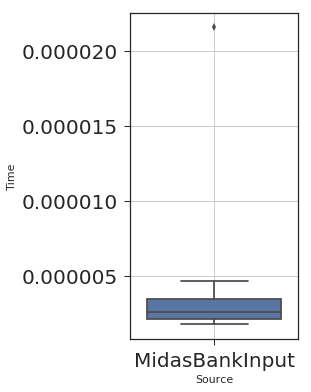

In [21]:
fig, ax = plt.subplots(figsize=(3,6))
sns.boxplot(x="Source", y="Time", data=TimeSource)

plt.xticks(rotation=0)
plt.grid()
#plt.yscale('log')
plt.show()

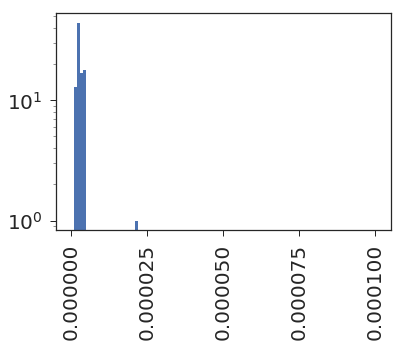

In [22]:
plt.hist(TimeSource['Time'],bins=100,range=(0,0.0001))
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

In [23]:
TimeEvent.head()

,Run,SubRun,Event,Time
0,17969,71,1,0.100087
1,17969,71,2,0.232157
2,17969,71,3,0.008068
3,17969,71,4,1.740593
4,17969,71,5,0.007943


In [24]:
print("Total Event Time: ", TimeEvent['Time'].sum())

Total Event Time:  32.0844211


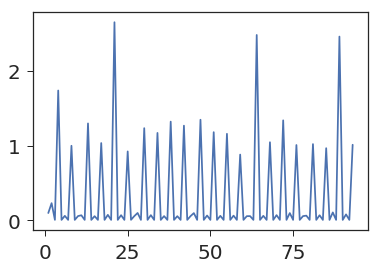

In [25]:
plt.plot(TimeEvent['Event'],TimeEvent['Time'])
plt.show()

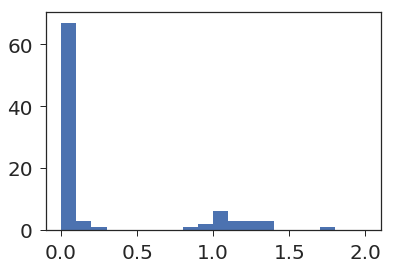

In [26]:
plt.hist(TimeEvent['Time'],bins=20,range=(0,2))
plt.show()

In [27]:
TimeModule.head()

,Run,SubRun,Event,Path,ModuleLabel,ModuleType,Time
0,17969,71,1,muonPath,fzInflater,FZInflater,0.005631
1,17969,71,1,muonPath,utcaUnpacker,UTCAUnpacker,0.000975
2,17969,71,1,muonPath,cccUnpacker,FC7Unpacker,0.002060
3,17969,71,1,muonPath,headerUnpacker,CaloHeaderUnpacker,0.001450
4,17969,71,1,muonPath,rawUnpacker,CaloRawUnpacker,0.084571


In [28]:
TimeModule.describe()

,Run,SubRun,Event,Time
count,1864.0,1864.0,1864.000000,1864.000000
mean,17969.0,71.0,47.291845,0.017201
std,0.0,0.0,26.906303,0.129223
min,17969.0,71.0,1.000000,0.000002
25%,17969.0,71.0,24.000000,0.000054
50%,17969.0,71.0,47.000000,0.000219
75%,17969.0,71.0,70.000000,0.002054
max,17969.0,71.0,93.000000,2.384607


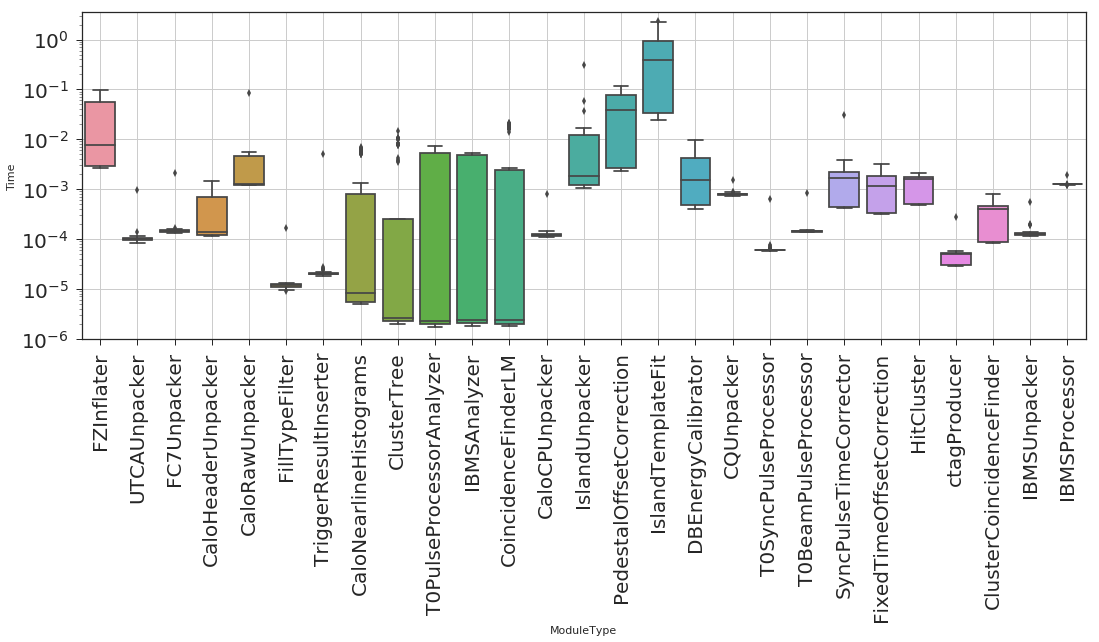

In [32]:
fig, ax = plt.subplots(figsize=(18,6))
sns.boxplot(x="ModuleType", y="Time", data=TimeModule)

plt.xticks(rotation=90)
plt.grid()
plt.yscale('log')
plt.ylim(10**(-6),3.5)
plt.show()

In [30]:
print("Total Module Time: ", TimeModule['Time'].sum())

Total Module Time:  32.062561394


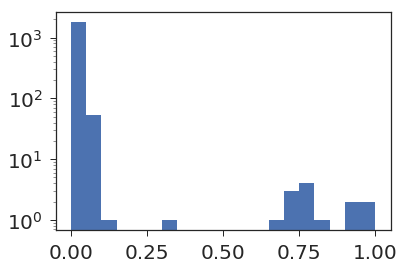

In [31]:
plt.hist(TimeModule['Time'],bins=20,range=(0,1))
plt.yscale('log')
plt.show()

In [12]:
IslandTemplateFit = TimeModule.loc[TimeModule['ModuleType'] == 'IslandTemplateFit']

In [40]:
IslandTemplateFit.head()

,Run,SubRun,Event,Path,ModuleLabel,ModuleType,Time
17,17969,71,2,muonPath,islandFitterDAQ,IslandTemplateFit,0.096018
50,17969,71,4,muonPath,islandFitterDAQ,IslandTemplateFit,0.669766
83,17969,71,6,muonPath,islandFitterDAQ,IslandTemplateFit,0.029149
116,17969,71,8,muonPath,islandFitterDAQ,IslandTemplateFit,0.436400
157,17969,71,11,muonPath,islandFitterDAQ,IslandTemplateFit,0.042295


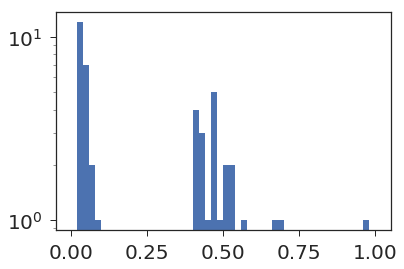

In [39]:
plt.hist(IslandTemplateFit['Time'],bins=50,range=(0,1))
plt.yscale('log')
plt.show()

---

### Compare this to the v8 version of this db

In [13]:
import sqlite3
conn8 = sqlite3.connect('.timing_v8.db')

In [14]:
c8 = conn8.cursor()

In [15]:
c8.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(c8.fetchall())

[('TimeSource',), ('TimeEvent',), ('TimeModule',)]


In [16]:
TimeSource8 = pandas.read_sql_query("SELECT * from TimeSource", conn8)
TimeEvent8 = pandas.read_sql_query("SELECT * from TimeEvent", conn8)
TimeModule8 = pandas.read_sql_query("SELECT * from TimeModule", conn8)

In [18]:
TimeSource8.head()

,Run,SubRun,Event,Source,Time
0,17969,71,1,MidasBankInput,0.000090
1,17969,71,2,MidasBankInput,0.000003
2,17969,71,3,MidasBankInput,0.000002
3,17969,71,4,MidasBankInput,0.000004
4,17969,71,5,MidasBankInput,0.000004


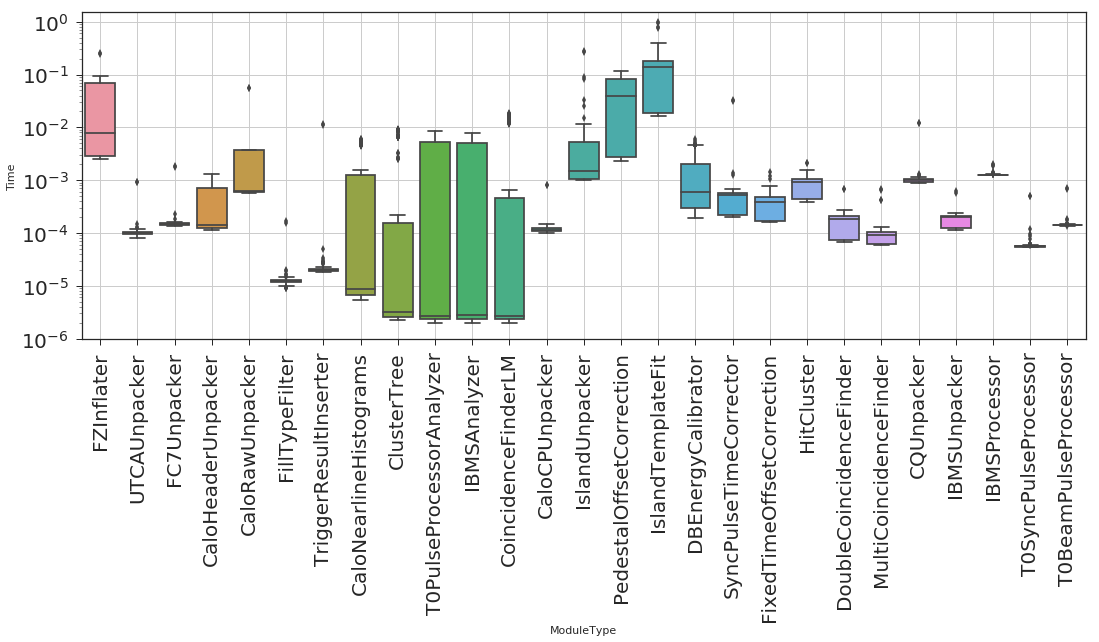

In [25]:
fig, ax = plt.subplots(figsize=(18,6))
sns.boxplot(x="ModuleType", y="Time", data=TimeModule8)

plt.xticks(rotation=90)
plt.grid()
plt.yscale('log')
plt.ylim(10**(-6),1.5)
plt.show()

---

### Now lets look at the igprof database

In [51]:
import sqlite3
conn = sqlite3.connect('igprof_out.db')

In [52]:
c = conn.cursor()

In [53]:
c.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(c.fetchall())

[('summary',), ('files',), ('symbols',), ('mainrows',), ('children',), ('parents',)]


In [59]:
summary = pandas.read_sql_query("SELECT * from summary", conn)
#files = pandas.read_sql_query("SELECT * from files", conn)
symbols = pandas.read_sql_query("SELECT * from symbols", conn)
mainrows = pandas.read_sql_query("SELECT * from mainrows", conn)
children = pandas.read_sql_query("SELECT * from children", conn)
parents = pandas.read_sql_query("SELECT * from parents", conn)

In [55]:
summary.head()

,counter,total_count,total_freq,tick_period
0,PERF_TICKS,66140,66140,0.005999


In [60]:
symbols.head()

,id,name,filename_id
0,14926736,<spontaneous>,14926656
1,27126848,tbb::internal::custom_scheduler<tbb::internal:...,25792976
2,37219856,clone,14936944
3,37219408,start_thread,16034320
4,40060592,tbb::internal::rml::private_worker::thread_rou...,25792976


In [69]:
symbols.loc[symbols['name'].str.contains("Fit")]

,id,name,filename_id
8,32084896,tbb::interface9::internal::start_for<tbb::bloc...,31925808
9,32069632,gm2calo::IslandTemplateFit::produce(art::Event...,31925808
10,32070368,"std::vector<gm2calo::CrystalHitArtRecord, std:...",31925808
11,31920160,_ZN7gm2calo14TemplateFitter16discontiguousFitI...,31925808
12,31925488,gm2calo::TemplateFitter::doFit(std::vector<dou...,27631648
13,32094064,gm2calo::TemplateFitter::evalTemplates(std::ve...,27631648
19,27126448,"gm2calo::CaloFitters::GetFitter(int, bool)",26723824
20,27126512,_ZN3tbb10interface98internal9start_forINS_13bl...,26723824
21,27126384,"gm2calo::CaloFitters::GetSpline(int, bool)",26723824
22,27126128,gm2calo::CaloFitters::CreateSplineFromFile(int...,26723824


In [61]:
mainrows.head()

,id,symbol_id,self_count,cumulative_count,kids,self_calls,total_calls,self_paths,total_paths,pct
0,1,14926736,0,66140,66140,0,66140,1,1,100.00
1,2,27126848,1,57241,57240,1,57241,8,8,86.55
2,3,37219856,0,54315,54315,0,54315,1,1,82.12
3,4,37219408,0,54315,54315,0,54315,1,1,82.12
4,5,40060592,0,54310,54310,0,54310,1,1,82.11


In [62]:
children.head()

,self_id,parent_id,from_parent_count,from_parent_calls,from_parent_paths,pct
0,3,1,54315,54315,1,82.12
1,15,1,9461,9461,1,14.30
2,98,1,1906,1906,1,2.88
3,131,1,421,421,1,0.64
4,467,1,27,27,1,0.04


In [63]:
parents.head()

,self_id,child_id,to_child_count,to_child_calls,to_child_paths,pct
0,91,2,3197,3197,7,4.83
1,8,2,54044,54044,1,81.71
2,1,3,54315,54315,1,82.12
3,3,4,54315,54315,1,82.12
4,4,5,54310,54310,1,82.11
